## A. Descargando los Datos 

Este ejercicio esta basado en los desarrollos del paper

J. R. Trump et. al. *Accretion Rate and the Physical Nature of Unobscured Active Galaxies*. [ApJ 733 60 (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...733...60T/abstract)

- Ingrese a la página 

[https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/733/60](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/733/60)

y descargue el archivo de datos, preferiblemente en el formato de `table2.dat` junto con el archivo `ReadMe` correspondiente.

- Lea el archivo e identifique las cantidades físicas reportadas en la tabla de datos mediante la funciín [astropy.io.ascii.read()](https://docs.astropy.org/en/stable/api/astropy.io.ascii.read.html). Cuantos objetos están catalogados en este archivo?

- Realice una gráfica del logaritmo de la luminosidad de acreción, $\log L$, contra el logaritmo de la masa del agujero negro en masas solares, $\log M$, e incluyendo las líneas de error respectivas. Utilice los siguientes marcadores para la figura, dependiendo del tipo de objeto presentado en la columna 'Type': Para AGNs de líneas anchas (Broad-line) utilice cruces negras, para AGNs de líneas delgadas (Narrow-line) utilice diamantes azules y para AGNs sin lineas (lineless) utilice cuadrados rojos.

## B. Cantidades Estadisticas

1. Extraiga la información correspondiente únicamente a los AGNs de líneas anchas (Broad-line) y obtenga cuántos de estos objetos se tienen en la muestra.

2. Obtendremos ahora una función de densidad de probabilidad con esta muestra de AGNs. Para ello, realice un histograma para los AGNs de líneas anchas ubicando en el eje vertical la densidad de objetos (i,e, el conteo normalizado) y en el eje horizontal el logaritmo de la masa del objeto central y utilice 20 bins.

3. Calcule los momentos de la distribución obtenida:
   - Promedio
   - Desviación Standard y Varianza
   - Asímetria Estadística (Skewness)
   - Kurtosis 

In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy import stats

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["mathtext.fontset"]

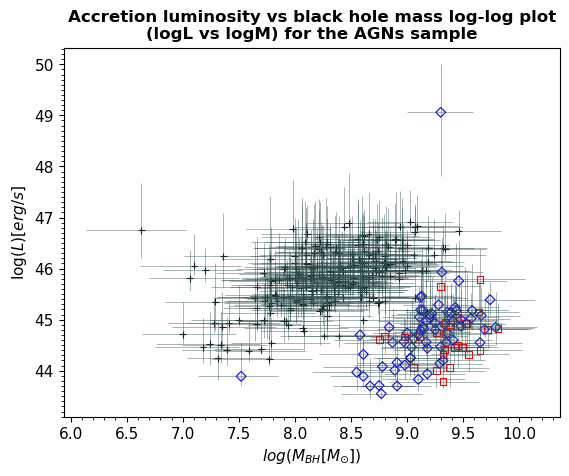

In [5]:
#Get data
#================================================================================================================================================================
data = ascii.read('data/table2.dat', readme='data/ReadMe')

#plot data and save
#================================================================================================================================================================

#define aux comprehension list for special markers and color criteria
colors = ['k' if Type == 'BL' else 'b' if Type == 'NL' else 'r' for Type in data['Type']]
markers = ['+' if Type == 'BL' else 'D' if Type == 'NL' else 's' for Type in data['Type']]

fig, ax = plt.subplots()
ax.set_title('Accretion luminosity vs black hole mass log-log plot\n(logL vs logM) for the AGNs sample', fontweight = 'bold'), 
ax.set_xlabel(r'$log(M_{BH}[M_{\odot}])$', fontsize = 11)
ax.set_ylabel(r'$\log(L)[erg/s]$', fontsize = 11)
ax.tick_params(axis='both', which='major', labelsize=11)

xlow, ylow = np.array(data['e_logM']), np.array(data['e_logL'])
xup, yup  = np.array(data['E_logM']), np.array(data['E_logL'])
xerror, yerror = [xlow, xup], [ylow, yup]

for x, y, c, m in zip(data['logM'], data['logL'], colors, markers):
     ax.scatter(x, y, ec = c, marker = m, s = 25, lw = 0.8, fc = 'none')

ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.errorbar(data['logM'], data['logL'], xerr = xerror, yerr = yerror, fmt = ' ', ecolor = 'darkslategray', elinewidth = 0.5, alpha = 0.6, capsize = 0)

plt.savefig('figures/log-log.png', dpi = 200)
plt.savefig('figures/log-log.pdf')


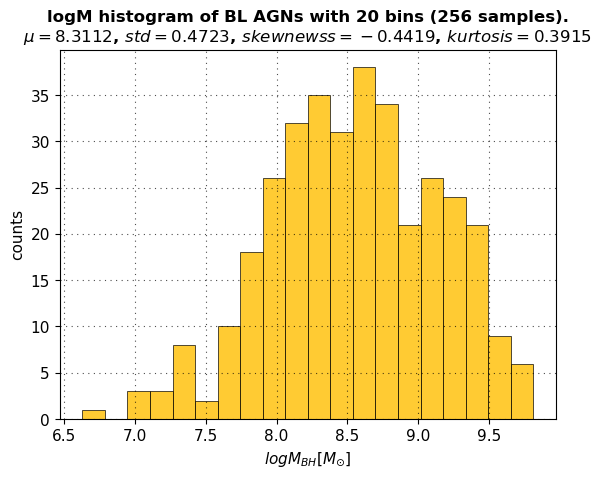

In [4]:
#statistical analysis
#========================================================================================================================

#get sample
sample = data[(data['Type'] == 'BL')]
#print(sample)

#analysis
mean = np.mean(sample['logM'])
var = np.var(sample['logM'])
std = np.std(sample['logM'])
skew = stats.skew(sample['logM'])
kurt = stats.kurtosis(sample['logM'])

# print(f'Arimethic mean: {mean:.4f}')
# print(f'Variance: {var:.4f}')
# print(f'Standard deviation: {std:.4f}')
# print(f'Skewness: {skew:.4f}')
# print(f'Kurtosis: {kurt:.4f}')

#histogram------------------------------------------------------------------------------------------------------------------------------------
plt.title(f'logM histogram of BL AGNs with 20 bins ({len(sample)} samples).\n$\mu = {mean:.4f}$, $std = {std:.4f}$, $skewnewss = {skew:.4f}$, $kurtosis = {kurt:.4f}$', fontweight = 'bold')
plt.xlabel('$logM_{BH}[M_{\odot}]$', fontsize = 11)
plt.ylabel('counts', fontsize = 11)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.hist(data['logM'], bins = 20, fc = '#ffbf00', ec = 'k', lw = 0.6, alpha = 0.8)
plt.grid(ls = (0,(1,4)), c = 'k', alpha = 0.7)

plt.savefig('figures/hist.png', dpi = 200)
plt.savefig('figures/hist.pdf')
plt.show()